___
# Ciência dos Dados - PROJETO 1

## Leonardo Imakuma Neves

## A diferença salarial entre homem e mulheres é maior do que a diferença salarial de etnias?

___
## Introdução

Busco analisar a diferença salarial entre as diferentes raças/cores da população brasileira ,compara las com diferença salarial encontrada entre mulheres e homens , e analisar o grau de escolaridade da população e ver como ele influencia na diferença salarial.

___
## Filtros da base de dados

In [113]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import zeros_like

In [157]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Leonardo\OneDrive\insper\dps 2018\ciencia dos dados\projeto 1


In [158]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
dd2011=pd.read_csv('PES2011.csv',sep=',')


In [159]:
#Pegar as colunas
dadosID2011= dd2011.loc[: ,["V0302","V6007","V4743","V0404","V8005","V4742"]]

In [160]:

dadosID2011.V0302=dadosID2011.V0302.astype("category")
dadosID2011.V0302.cat.categories=(['Masculino','Feminino'])
dadosID2011.V6007=dadosID2011.V6007.astype("category")
dadosID2011.V6007.cat.categories=(['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior de graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.'])
dadosID2011.V4743=dadosID2011.V4743.astype("category")
dadosID2011.V4743.cat.categories=(['Sem rendimento','Até ¼ ','¼ até ½ ','De ½ até 1 ','De 1 até 2 ','De 2 até 3 ','De 3 até 5','Mais de 5','Sem declaração'])
dadosID2011.V0404=dadosID2011.V0404.astype("category")
dadosID2011.V0404.cat.categories=(['Indígena','Branca','Preta','Amarela','Parda'])
dadosID2011.V4742=dadosID2011.V4742.astype('float')

In [161]:
#tirar os NaN
#Dados2011Completos=dadosID2011.dropna()

In [162]:
#filtragem por cor/raça
indio=dadosID2011.loc[(dadosID2011['V0404'] == 'Indígena')]
branca=dadosID2011.loc[(dadosID2011['V0404'] == 'Branca')]
negra=dadosID2011.loc[(dadosID2011['V0404'] == 'Preta')]
parda=dadosID2011.loc[(dadosID2011['V0404'] == 'Parda')]
amarela=dadosID2011.loc[(dadosID2011['V0404'] == 'Amarela')]

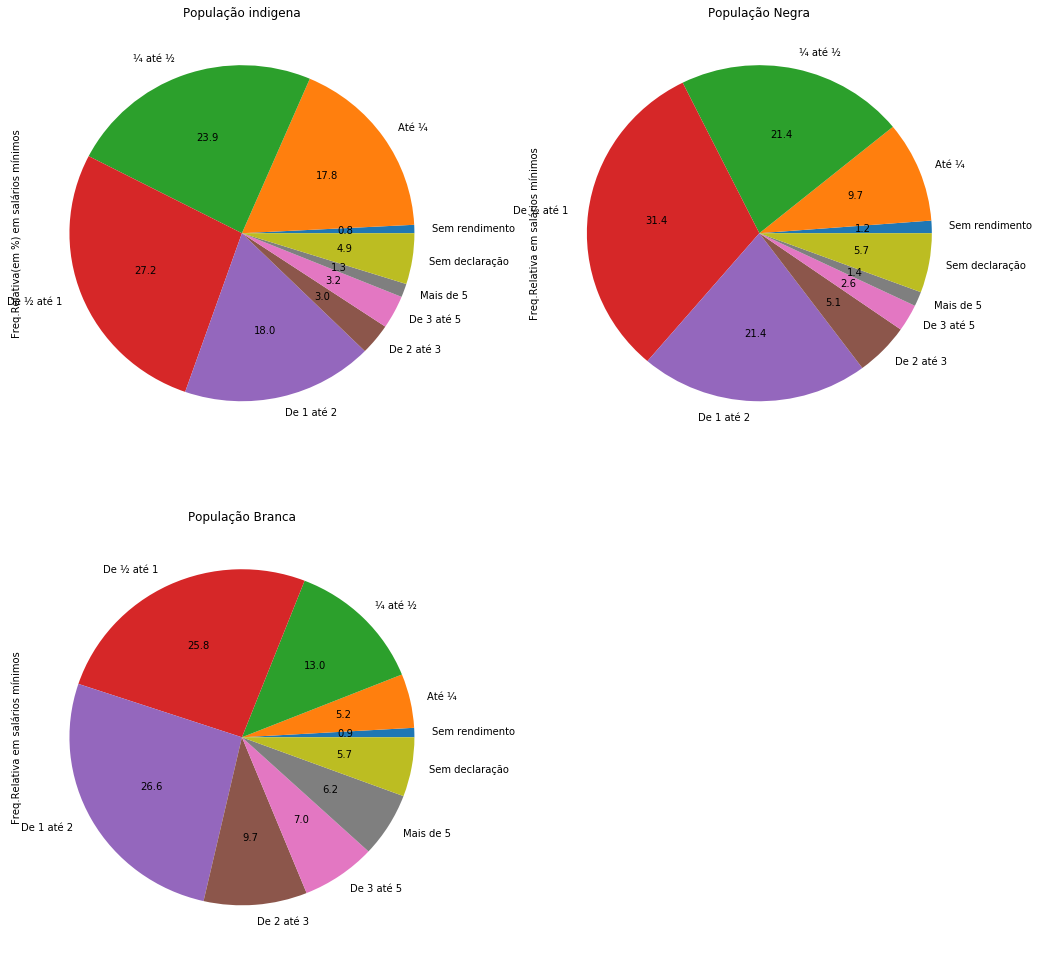

In [163]:
fig = plt.figure(figsize=(17, 17))

###########################################################################################################################
entrada = (indio.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(221)
plot = entrada.plot(kind='pie',title='População indigena',autopct='%.1f')
plt.ylabel('Freq.Relativa(em %) em salários mínimos')
plt.xlabel('')

entrada2 = (negra.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(222)
plot = entrada2.plot(kind='pie',title='População Negra',autopct='%.1f')
plt.ylabel('Freq.Relativa em salários mínimos')
plt.xlabel('')



entrada3 = (branca.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(223)
plot = entrada3.plot(kind='pie',title='População Branca',autopct='%.1f')
plt.ylabel('Freq.Relativa em salários mínimos')


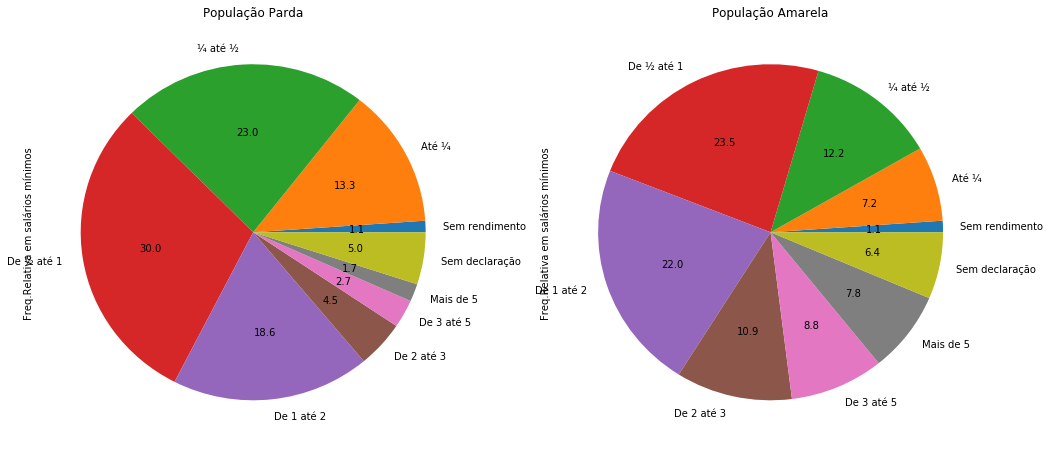

In [164]:
fig = plt.figure(figsize=(17, 17))

entrada4 = (parda.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(221)
plot = entrada4.plot(kind='pie',title='População Parda',autopct='%.1f')
plt.ylabel('Freq.Relativa em salários mínimos')


entrada5 = (amarela.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(222)
plot = entrada5.plot(kind='pie',title='População Amarela',autopct='%.1f')
plt.ylabel('Freq.Relativa em salários mínimos')



In [165]:
#filtragem por sexo
homens=dadosID2011.loc[(dadosID2011['V0302'] == 'Masculino')]
mulheres=dadosID2011.loc[(dadosID2011['V0302'] == 'Feminino')]

In [166]:
def converter(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

In [167]:
cores1 = (dadosID2011.V0404.value_counts(sort=True, normalize=True)*100).round(decimals=1)
print(cores1,'\n')


Parda       46.2
Branca      44.3
Preta        8.5
Indígena     0.5
Amarela      0.5
Name: V0404, dtype: float64 



In [168]:
#Freq.relativa (%) por faixa salarial
salariocor = pd.crosstab([dadosID2011.V0404],dadosID2011.V4743)*(100/358919)
salariocor

V4743,Sem rendimento,Até ¼,¼ até ½,De ½ até 1,De 1 até 2,De 2 até 3,De 3 até 5,Mais de 5,Sem declaração
V0404,,,,,,,,,
Indígena,0.003901,0.089714,0.120640,0.137914,0.090828,0.015045,0.016160,0.006687,0.024518
Branca,0.415414,2.279344,5.751716,11.416503,11.762264,4.283418,3.083704,2.720948,2.526754
Preta,0.102530,0.824977,1.814058,2.661603,1.807650,0.434638,0.220663,0.119526,0.480053
Amarela,0.005572,0.035941,0.061017,0.117297,0.110053,0.054608,0.044021,0.038727,0.032041
Parda,0.519059,6.133417,10.592362,13.825125,8.570179,2.090722,1.233705,0.766190,2.317793


In [169]:
#salario por escolaridade e cor/raça
edusal2=pd.crosstab([dadosID2011.V6007,dadosID2011.V0404],dadosID2011.V4743)*(100/358919)
edusal2

V4743                                                        Sem rendimento  \
V6007                                              V0404                      
Elementar (primário)                               Indígena        0.001114   
                                                   Branca          0.036498   
                                                   Preta           0.009752   
                                                   Amarela         0.000836   
                                                   Parda           0.036220   
Médio 1º ciclo (ginasial, etc.)                    Indígena        0.000000   
                                                   Branca          0.010030   
                                                   Preta           0.002508   
                                                   Amarela         0.000000   
                                                   Parda           0.009194   
Médio 2º ciclo (científico, clássico, etc.)        Indígena        0.000557   
                                                   Branca          0.004179   
                                                   Preta           0.000557   
                                                   Amarela         0.000000   
                                                   Parda           0.003622   
Regular do ensino fundamental ou do 1º grau        Indígena        0.000279   
                                                   Branca          0.080241   
                                                   Preta           0.024797   
                                                   Amarela         0.001393   
                                                   Parda           0.123983   
Regular do ensino médio ou do 2º grau              Indígena        0.000836   
                                                   Branca          0.074669   
                                                   Preta           0.022568   
                                                   Amarela         0.000557   
                                                   Parda           0.092779   
Educação de jovens e adultos ou supletivo do en... Indígena        0.000000   
                                                   Branca          0.004179   
                                                   Preta           0.000557   
                                                   Amarela         0.000000   
                                                   Parda           0.003065   
...                                                                     ...   
Superior de graduação                              Indígena        0.000000   
                                                   Branca          0.026190   
                                                   Preta           0.001672   
                                                   Amarela         0.001114   
                                                   Parda           0.011702   
Mestrado ou doutorado                              Indígena        0.000000   
                                                   Branca          0.000557   
                                                   Preta           0.000000   
                                                   Amarela         0.000000   
                                                   Parda           0.000000   
Alfabetização de jovens e adultos                  Indígena        0.000000   
                                                   Branca          0.001114   
                                                   Preta           0.000279   
                                                   Amarela         0.000000   
                                                   Parda           0.004179   
Creche                                             Indígena        0.000000   
                                                   Branca          0.001672   
                                                  

In [170]:
#o valor do step foi definido com base no salario minimo de 2011
faixa = range(100,4000,271)
renda=dadosID2011.V4742[(dadosID2011.V4742 >= 0) & (dadosID2011.V4742 <= 99999999)]
renda.describe()

count    338740.000000
mean        745.033073
std        1220.184965
min           0.000000
25%         238.000000
50%         448.000000
75%         800.000000
max      125000.000000
Name: V4742, dtype: float64

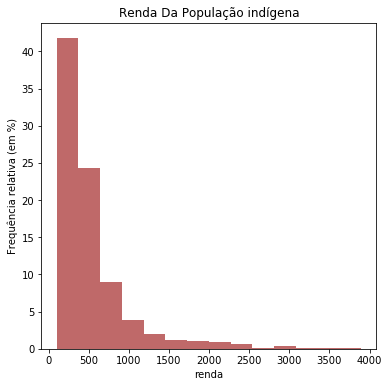

count     1726.000000
mean       506.734647
std        995.153874
min          0.000000
25%        160.000000
50%        332.000000
75%        557.000000
max      31750.000000
Name: V4742, dtype: float64


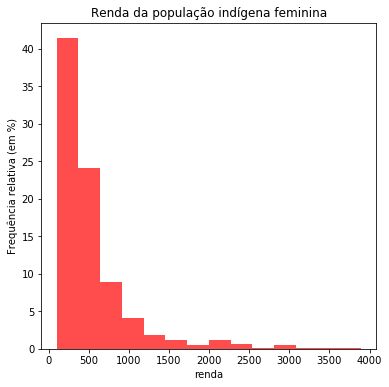

count      906.000000
mean       526.862031
std       1216.149505
min          0.000000
25%        159.000000
50%        324.500000
75%        560.000000
max      31750.000000
Name: V4742, dtype: float64


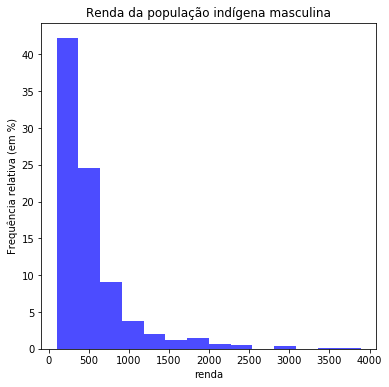

count      820.000000
mean       484.496341
std        671.262606
min          0.000000
25%        165.250000
50%        333.000000
75%        556.000000
max      10333.000000
Name: V4742, dtype: float64


In [171]:
renda_indios=renda.loc[(dadosID2011['V0404'] == 'Indígena')]
plot = renda_indios.plot.hist(bins=faixa,title='Renda Da População indígena', weights=zeros_like(renda_indios)+1./renda_indios.size*100, figsize=(6, 6), alpha=0.7,color=("Brown"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_indios.describe())

renda_indias=renda_indios.loc[(indio['V0302'] == 'Feminino')]
plot2 = renda_indias.plot.hist(bins=faixa,title='Renda da população indígena feminina', weights=zeros_like(renda_indias)+1./renda_indias.size*100, figsize=(6, 6), alpha=0.7,color=("Red"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_indias.describe())

renda_indios_homens=renda_indios.loc[(indio['V0302'] == 'Masculino')]
plot3 = renda_indios_homens.plot.hist(bins=faixa,title='Renda da população indígena masculina', weights=zeros_like(renda_indios_homens)+1./renda_indios_homens.size*100, figsize=(6, 6), alpha=0.7,color=("Blue"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_indios_homens.describe())

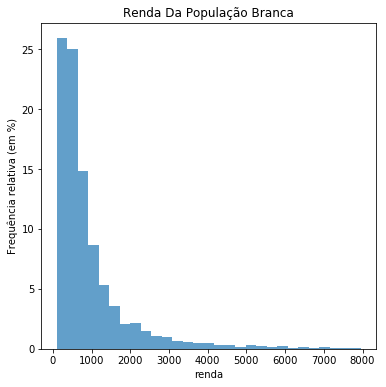

count    149717.000000
mean        993.044016
std        1548.379056
min           0.000000
25%         325.000000
50%         575.000000
75%        1066.000000
max      125000.000000
Name: V4742, dtype: float64


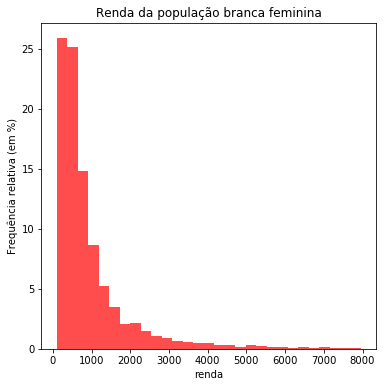

count     79255.000000
mean        980.826800
std        1504.727625
min           0.000000
25%         323.000000
50%         572.000000
75%        1061.500000
max      125000.000000
Name: V4742, dtype: float64


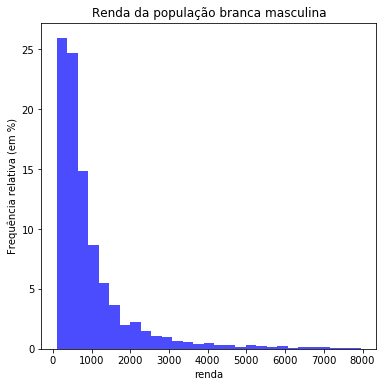

count     70462.000000
mean       1006.785828
std        1595.950773
min           0.000000
25%         325.000000
50%         582.000000
75%        1075.000000
max      100000.000000
Name: V4742, dtype: float64


In [172]:
faixa = range(100,8000,271)
renda_brancos=renda.loc[(dadosID2011['V0404'] == 'Branca')]
plot = renda_brancos.plot.hist(bins=faixa,title='Renda Da População Branca', weights=zeros_like(renda_brancos)+1./renda_brancos.size*100, figsize=(6, 6), alpha=0.7)
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_brancos.describe())

renda_brancas=renda_brancos.loc[(branca['V0302'] == 'Feminino')]
plot2 = renda_brancas.plot.hist(bins=faixa,title='Renda da população branca feminina', weights=zeros_like(renda_brancas)+1./renda_brancas.size*100, figsize=(6, 6), alpha=0.7,color=("Red"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_brancas.describe())

renda_brancos_homens=renda_brancos.loc[(branca['V0302'] == 'Masculino')]
plot3 = renda_brancos_homens.plot.hist(bins=faixa,title='Renda da população branca masculina', weights=zeros_like(renda_brancos_homens)+1./renda_brancos_homens.size*100, figsize=(6, 6), alpha=0.7,color=("Blue"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_brancos_homens.describe())

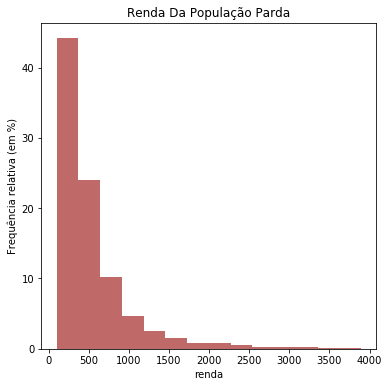

count    156958.000000
mean        541.235872
std         818.311105
min           0.000000
25%         191.000000
50%         350.000000
75%         600.000000
max       70000.000000
Name: V4742, dtype: float64


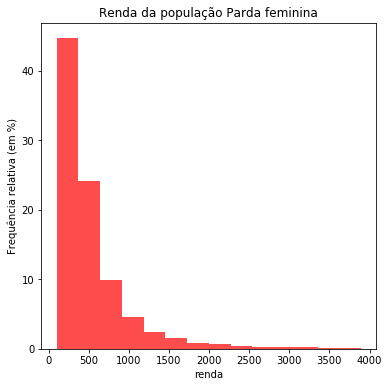

count    79162.000000
mean       529.018961
std        761.181212
min          0.000000
25%        188.000000
50%        346.000000
75%        598.000000
max      37750.000000
Name: V4742, dtype: float64


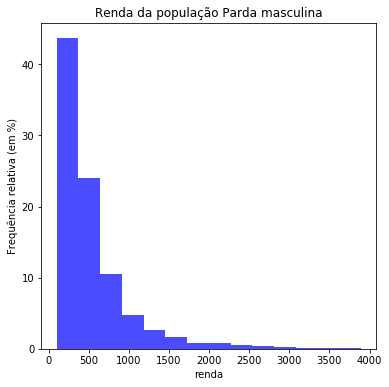

count    77796.000000
mean       553.667297
std        872.442512
min          0.000000
25%        194.000000
50%        357.000000
75%        621.000000
max      70000.000000
Name: V4742, dtype: float64


In [173]:
faixa = range(100,4000,271)
renda_pardos=renda.loc[(dadosID2011['V0404'] == 'Parda')]
plot = renda_pardos.plot.hist(bins=faixa,title='Renda Da População Parda', weights=zeros_like(renda_pardos)+1./renda_pardos.size*100, figsize=(6, 6), alpha=0.7,color=("Brown"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_pardos.describe())

renda_pardas=renda_pardos.loc[(parda['V0302'] == 'Feminino')]
plot2 = renda_pardas.plot.hist(bins=faixa,title='Renda da população Parda feminina', weights=zeros_like(renda_pardas)+1./renda_pardas.size*100, figsize=(6, 6), alpha=0.7,color=("Red"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_pardas.describe())

renda_pardos_homens=renda_pardos.loc[(parda['V0302'] == 'Masculino')]
plot3 = renda_pardos_homens.plot.hist(bins=faixa,title='Renda da população Parda masculina', weights=zeros_like(renda_pardos_homens)+1./renda_pardos_homens.size*100, figsize=(6, 6), alpha=0.7,color=("Blue"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_pardos_homens.describe())

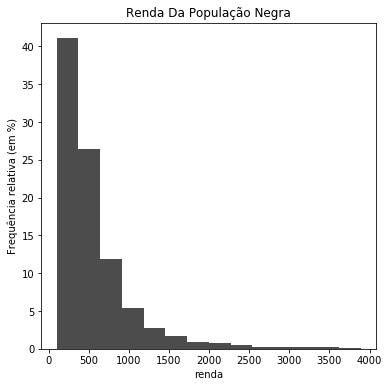

count    28662.000000
mean       557.524841
std        707.063538
min          0.000000
25%        222.000000
50%        386.000000
75%        650.000000
max      25000.000000
Name: V4742, dtype: float64


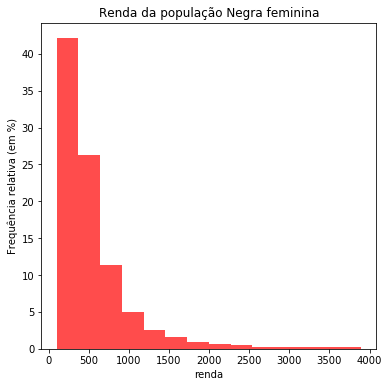

count    14158.000000
mean       545.695861
std        700.624343
min          0.000000
25%        215.000000
50%        375.000000
75%        629.000000
max      25000.000000
Name: V4742, dtype: float64


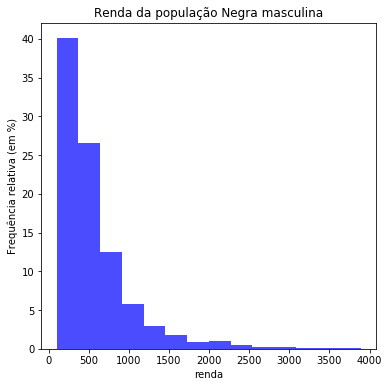

count    14504.000000
mean       569.071635
std        713.127977
min          0.000000
25%        228.000000
50%        400.000000
75%        672.000000
max      15000.000000
Name: V4742, dtype: float64


In [174]:
faixa = range(100,4000,271)
renda_negros=renda.loc[(dadosID2011['V0404'] == 'Preta')]
plot = renda_negros.plot.hist(bins=faixa,title='Renda Da População Negra', weights=zeros_like(renda_negros)+1./renda_negros.size*100, figsize=(6, 6), alpha=0.7,color=("Black"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_negros.describe())

renda_negras=renda_negros.loc[(negra['V0302'] == 'Feminino')]
plot2 = renda_negras.plot.hist(bins=faixa,title='Renda da população Negra feminina', weights=zeros_like(renda_negras)+1./renda_negras.size*100, figsize=(6, 6), alpha=0.7,color=("Red"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_negras.describe())

renda_negros_homens=renda_negros.loc[(negra['V0302'] == 'Masculino')]
plot3 = renda_negros_homens.plot.hist(bins=faixa,title='Renda da população Negra masculina', weights=zeros_like(renda_negros_homens)+1./renda_negros_homens.size*100, figsize=(6, 6), alpha=0.7,color=("Blue"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_negros_homens.describe())

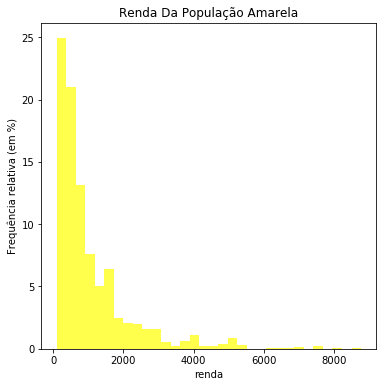

count     1677.000000
mean      1127.746571
std       2068.517587
min          0.000000
25%        308.000000
50%        600.000000
75%       1261.000000
max      59100.000000
Name: V4742, dtype: float64


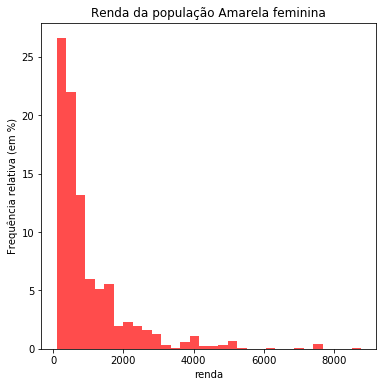

count      925.000000
mean      1077.777297
std       2395.599095
min          0.000000
25%        273.000000
50%        545.000000
75%       1191.000000
max      59100.000000
Name: V4742, dtype: float64


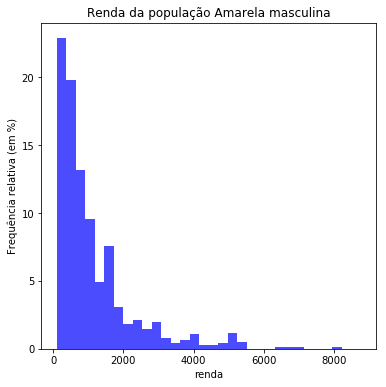

count      752.000000
mean      1189.211436
std       1575.156869
min          0.000000
25%        339.500000
50%        676.000000
75%       1460.000000
max      15700.000000
Name: V4742, dtype: float64


In [175]:
faixa = range(100,9000,271)
renda_amarelos=renda.loc[(dadosID2011['V0404'] == 'Amarela')]
plot = renda_amarelos.plot.hist(bins=faixa,title='Renda Da População Amarela', weights=zeros_like(renda_amarelos)+1./renda_amarelos.size*100, figsize=(6, 6), alpha=0.7,color=("Yellow"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_amarelos.describe())

renda_amarelas=renda_amarelos.loc[(amarela['V0302'] == 'Feminino')]
plot2 = renda_amarelas.plot.hist(bins=faixa,title='Renda da população Amarela feminina', weights=zeros_like(renda_amarelas)+1./renda_amarelas.size*100, figsize=(6, 6), alpha=0.7,color=("Red"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_amarelas.describe())

renda_amarelos_homens=renda_amarelos.loc[(amarela['V0302'] == 'Masculino')]
plot3 = renda_amarelos_homens.plot.hist(bins=faixa,title='Renda da população Amarela masculina', weights=zeros_like(renda_amarelos_homens)+1./renda_amarelos_homens.size*100, figsize=(6, 6), alpha=0.7,color=("Blue"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_amarelos_homens.describe())

___
## Análise e Resultados

___
## Conclusão 

Descreva aqui suas conclusões!